In [ ]:
- hacim tahminleme
    - klasik model
        - ürün bazlı geçmiş 1,2,3,5,7,14,30 günlük toplam siparişler
        - müşteri bazlı geçmiş 1,2,3,5,7,14,30 günlük toplam siparişler
        - diğer featurelar
                - enflasyon
                - döviz
                - üfe
                - 
    - rnn
    - lstm
    - ek veriler:
        dolar kuru
        enflasyon

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
order_df = pd.read_csv('datathon_order.csv', parse_dates=['Sipariş Tarihi'])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
order_df.columns = ['order_num', 'order_item', 'order_type', 'material_num', 'order_amount', 
                    'palette_std', 'customer_num', 'order_date', 'operation_type']

In [4]:
def convert_string_to_date(str_date):
    
    str_date = str(str_date)
    str_date = str_date.replace('/','')
    str_date = str_date.replace('.','')
    
    len_date = len(str_date)
    
    if len_date>7:
        return pd.Timestamp(int(str_date[4:]), int(str_date[2:4]), int(str_date[:2]))   
    elif len_date==7:
        return pd.Timestamp(int(str_date[3:]), int(str_date[1:3]), int(str_date[:1]))   
    elif len_date==6:
        return pd.Timestamp(int(str_date[2:]), int(str_date[1:2]), int(str_date[:1]))   

In [5]:
order_df['order_item'] = order_df['order_item'].fillna(0)

In [6]:
order_df['order_num'] = order_df['order_num'].astype('str')
order_df['order_item'] = order_df['order_item'].astype('int16')
order_df['material_num'] = order_df['material_num'].astype('str')
order_df['order_amount'] = order_df['order_amount'].astype('int32')

# order_df['order_type'] = order_df['order_type'].astype('category')
# order_df['palette_std'] = order_df['palette_std'].astype('category')
# order_df['customer_num'] = order_df['customer_num'].astype('category')
# order_df['operation_type'] = order_df['operation_type'].astype('category')

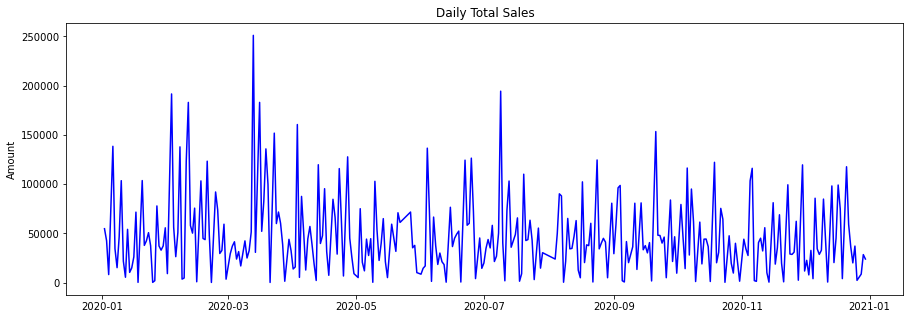

In [24]:
order_summary = order_df.groupby(['order_date'])['order_amount'].sum()
plt.figure(figsize=(15,5))
plt.plot(order_summary.index, order_summary.values, 'b')
plt.title('Daily Total Sales')
plt.ylabel('Amount')
plt.show();

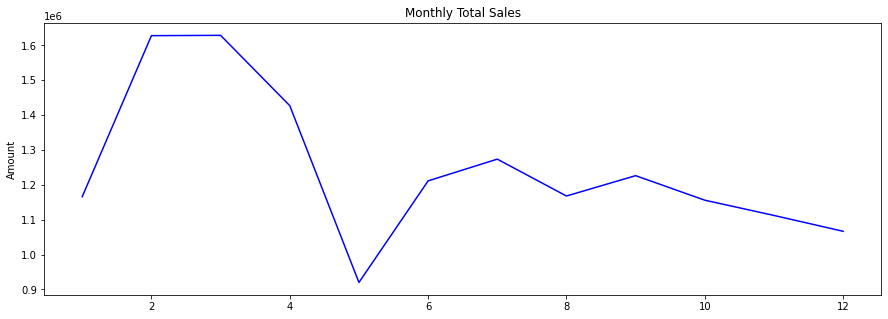

In [23]:
order_summary = order_df.groupby(order_df['order_date'].dt.month)['order_amount'].sum()
plt.figure(figsize=(15,5))
plt.plot(order_summary.index, order_summary.values, 'b')
plt.title('Monthly Total Sales')
plt.ylabel('Amount')
plt.show();

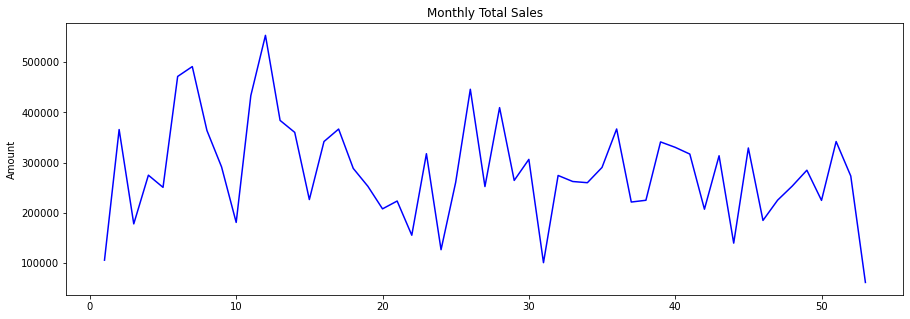

In [25]:
order_summary = order_df.groupby(order_df['order_date'].dt.week)['order_amount'].sum()
plt.figure(figsize=(15,5))
plt.plot(order_summary.index, order_summary.values, 'b')
plt.title('Monthly Total Sales')
plt.ylabel('Amount')
plt.show();

In [13]:
for col in order_df.columns:
    print(f'# of unique values in {col} : {order_df[col].nunique()}')

# of unique values in order_num : 90559
# of unique values in order_item : 180
# of unique values in order_type : 4
# of unique values in material_num : 793
# of unique values in order_amount : 1243
# of unique values in palette_std : 119
# of unique values in customer_num : 671
# of unique values in order_date : 319
# of unique values in operation_type : 2


In [14]:
order_df.groupby(['order_type'])['order_amount'].sum()

order_type
10.0    1260009
20.0    9995657
30.0      59115
40.0    3668204
Name: order_amount, dtype: int32

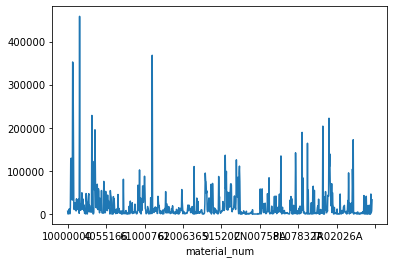

In [16]:
order_df.groupby(['material_num'])['order_amount'].sum().plot()

In [18]:
order_df.groupby(['material_num'])['order_amount'].sum().nlargest(10)

material_num
4016984     458685
61001960    368298
4002326     352764
4002329     344800
4047491     228728
TR01822B    222226
TR01575A    203860
4050584     195385
PL08105A    189395
TR02288A    172344
Name: order_amount, dtype: int32

In [19]:
order_df.groupby(['material_num'])['order_amount'].sum().nsmallest(10)

material_num
4253047     1
669690      1
669719      1
CN00912A    1
PL03154A    1
TR00191B    1
TR01657A    1
TR01659A    1
4253046     2
61008454    2
Name: order_amount, dtype: int32

In [27]:
import ppscore as pps
pps.score(order_df, "material_num", "order_amount")

{'x': 'material_num',
 'y': 'order_amount',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 28.839,
 'model_score': 33.17505908266553,
 'model': DecisionTreeRegressor()}

In [28]:
pps.predictors(order_df, "order_amount")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,order_num,order_amount,0,regression,True,mean absolute error,28.8390,30.128387,DecisionTreeRegressor()
1,order_item,order_amount,0,regression,True,mean absolute error,28.8390,37.413510,DecisionTreeRegressor()
2,order_type,order_amount,0,regression,True,mean absolute error,27.0562,35.661680,DecisionTreeRegressor()
3,material_num,order_amount,0,regression,True,mean absolute error,28.8390,33.175059,DecisionTreeRegressor()
4,palette_std,order_amount,0,regression,True,mean absolute error,28.0414,33.587205,DecisionTreeRegressor()
5,customer_num,order_amount,0,regression,True,mean absolute error,28.8390,34.331619,DecisionTreeRegressor()
6,order_date,order_amount,0,regression,True,mean absolute error,28.8390,42.198084,DecisionTreeRegressor()
7,operation_type,order_amount,0,regression,True,mean absolute error,28.8390,38.902584,DecisionTreeRegressor()


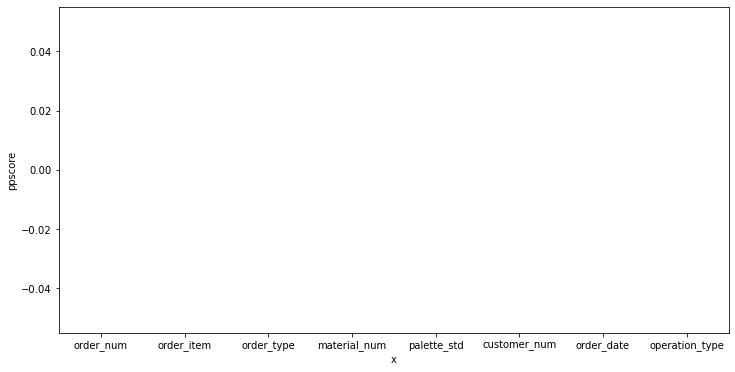

In [29]:
import seaborn as sns
plt.figure(figsize=(12,6))
predictors_df = pps.predictors(order_df, y="order_amount")
sns.barplot(data=predictors_df, x="x", y="ppscore")

In [30]:
predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,order_num,order_amount,0,regression,True,mean absolute error,28.8390,30.128387,DecisionTreeRegressor()
1,order_item,order_amount,0,regression,True,mean absolute error,28.8390,37.413510,DecisionTreeRegressor()
2,order_type,order_amount,0,regression,True,mean absolute error,27.0562,35.661680,DecisionTreeRegressor()
3,material_num,order_amount,0,regression,True,mean absolute error,28.8390,33.175059,DecisionTreeRegressor()
4,palette_std,order_amount,0,regression,True,mean absolute error,28.0414,33.587205,DecisionTreeRegressor()
5,customer_num,order_amount,0,regression,True,mean absolute error,28.8390,34.331619,DecisionTreeRegressor()
6,order_date,order_amount,0,regression,True,mean absolute error,28.8390,42.198084,DecisionTreeRegressor()
7,operation_type,order_amount,0,regression,True,mean absolute error,28.8390,38.902584,DecisionTreeRegressor()


In [ ]:
weekly_resample = df.rolling('7D')
aggregated_df = weekly_resample.agg(['min', 'mean', 'max', 'std'])
aggregated_df.columns = ['_'.join(col).strip() + '_week' for col in 
                         aggregated_df.columns.values]